[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Missing values before handling:
text     0
label    1
dtype: int64

Class distribution:
label
1.0    48179
0.0    42273
3.0    19524
4.0    15992
2.0    11359
5.0     4975
Name: count, dtype: int64

Training and evaluating SVM with linear kernel...

SVM with linear kernel:
Accuracy: 0.8583
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90      8455
         1.0       0.87      0.90      0.88      9636
         2.0       0.77      0.63      0.69      2272
         3.0       0.87      0.85      0.86      3905
         4.0       0.82      0.83      0.83      3198
         5.0       0.75      0.72      0.73       995

    accuracy                           0.86     28461
   macro avg       0.83      0.81      0.82     28461
weighted avg       0.86      0.86      0.86     28461



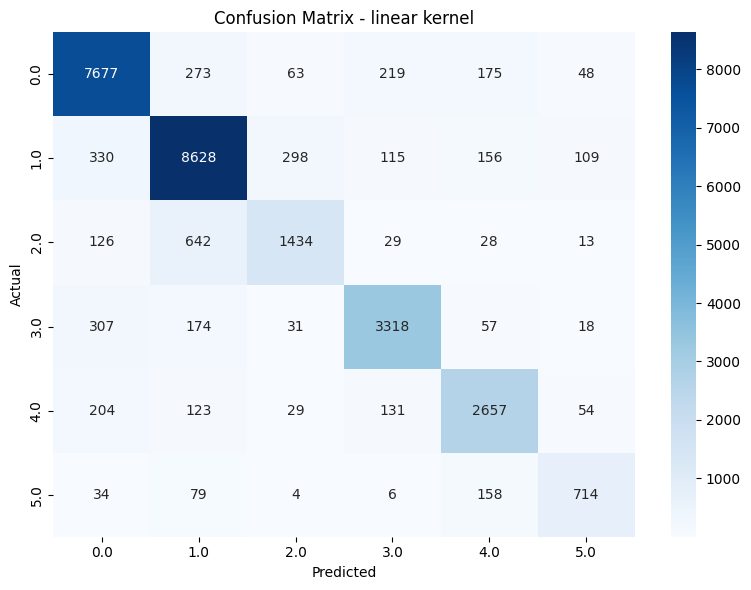


Training and evaluating SVM with poly kernel...

SVM with poly kernel:
Accuracy: 0.6368
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.79      8455
         1.0       0.52      0.98      0.68      9636
         2.0       0.88      0.13      0.23      2272
         3.0       0.94      0.29      0.44      3905
         4.0       0.91      0.25      0.39      3198
         5.0       0.81      0.12      0.21       995

    accuracy                           0.64     28461
   macro avg       0.81      0.42      0.46     28461
weighted avg       0.75      0.64      0.59     28461



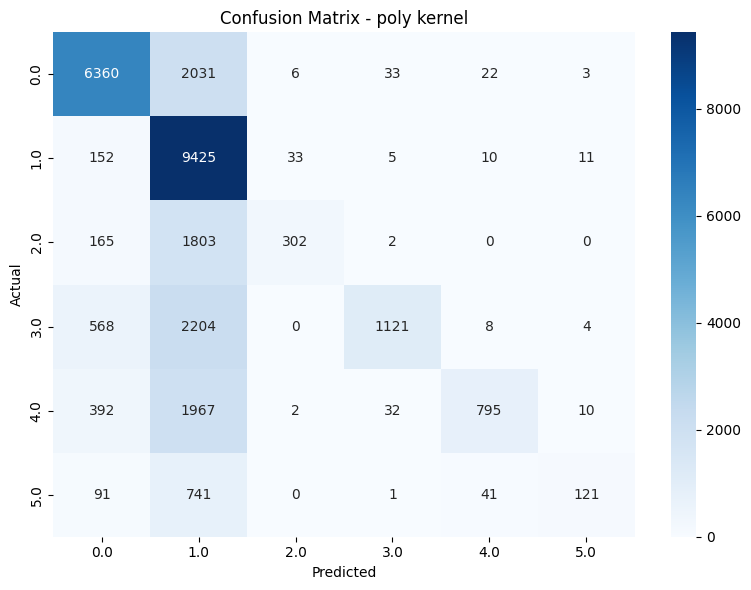


Training and evaluating SVM with rbf kernel...

SVM with rbf kernel:
Accuracy: 0.8423
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      8455
         1.0       0.81      0.92      0.86      9636
         2.0       0.82      0.53      0.64      2272
         3.0       0.89      0.80      0.84      3905
         4.0       0.84      0.77      0.81      3198
         5.0       0.79      0.57      0.66       995

    accuracy                           0.84     28461
   macro avg       0.84      0.75      0.78     28461
weighted avg       0.84      0.84      0.84     28461



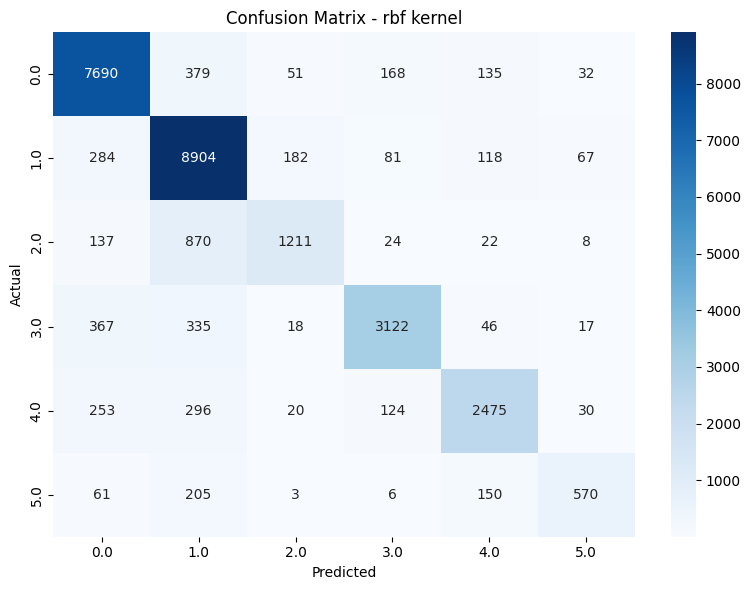


Training and evaluating SVM with sigmoid kernel...

SVM with sigmoid kernel:
Accuracy: 0.8573
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      8455
         1.0       0.87      0.90      0.88      9636
         2.0       0.78      0.62      0.69      2272
         3.0       0.87      0.85      0.86      3905
         4.0       0.82      0.83      0.82      3198
         5.0       0.76      0.71      0.73       995

    accuracy                           0.86     28461
   macro avg       0.83      0.80      0.81     28461
weighted avg       0.86      0.86      0.86     28461



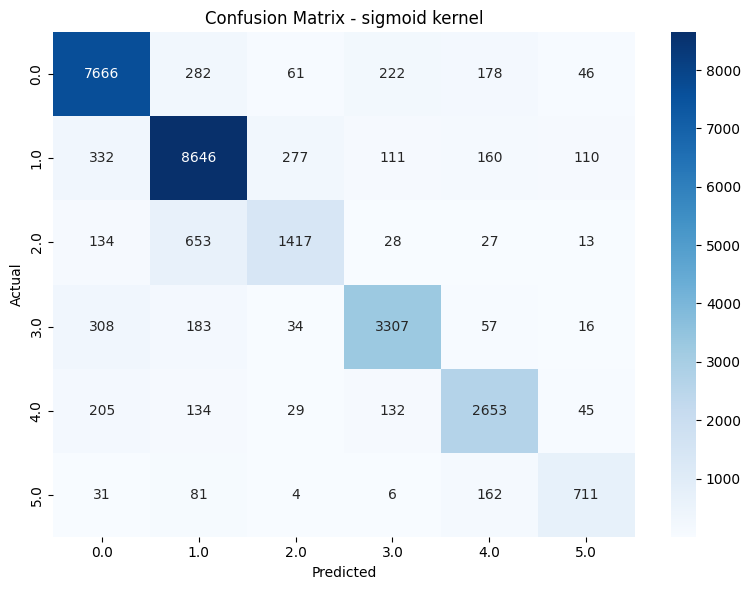


Performance comparison across kernels:
         accuracy  precision    recall  f1-score
linear   0.858297   0.856637  0.858297  0.856772
poly     0.636801   0.749564  0.636801  0.593029
rbf      0.842275   0.842710  0.842275  0.837720
sigmoid  0.857314   0.855640  0.857314  0.855623


<Figure size 1000x600 with 0 Axes>

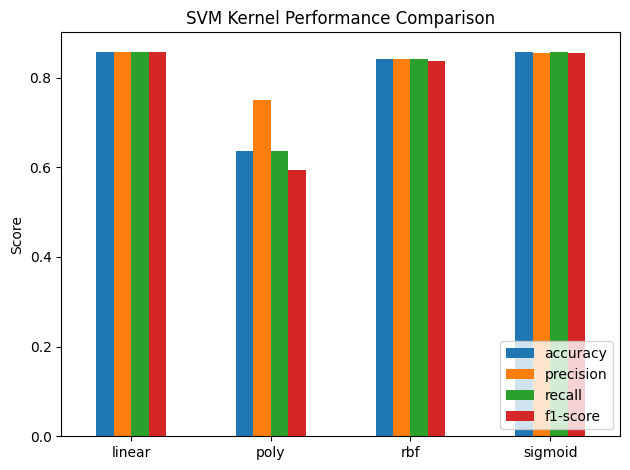


✅ Best performing kernel: linear

✅ Model, vectorizer, and label encoder saved!


In [2]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import re
import string
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# 🛠 Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# 📥 Load dataset
data = pd.read_csv('/content/emotions.csv')  # Replace with your actual path

# 🚫 Handle missing values and duplicates
print("Missing values before handling:")
print(data.isnull().sum())
data.dropna(inplace=True)
data.drop_duplicates(subset='text', inplace=True)

# 🧾 Show class distribution
print("\nClass distribution:")
print(data['label'].value_counts())

# ✂ Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# 🧹 Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

# 🔤 Encode emotion labels
label_encoder = LabelEncoder()
data['encoded_label'] = label_encoder.fit_transform(data['label'])

# 📊 Split data
X = data['cleaned_text']
y = data['encoded_label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✨ TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=20000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 🛠 Optional: limit training size for speed
X_train_tfidf = X_train_tfidf[:20000]
y_train = y_train[:20000]

# 📊 Evaluate SVM with different kernels
def evaluate_svm(kernel_type):
    print(f"\nTraining and evaluating SVM with {kernel_type} kernel...")
    model = SVC(kernel=kernel_type, random_state=42)
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Convert class names to strings
    class_names = [str(cls) for cls in label_encoder.classes_]

    acc = accuracy_score(y_test, y_pred)
    report_dict = classification_report(
        y_test, y_pred, target_names=class_names, output_dict=True
    )

    print(f"\nSVM with {kernel_type} kernel:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # 📉 Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {kernel_type} kernel')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    return acc, report_dict, model

# 🔄 Try multiple kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}
best_model = None
best_kernel = ""
best_acc = 0

for kernel in kernels:
    accuracy, report, model = evaluate_svm(kernel)
    results[kernel] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }
    if accuracy > best_acc:
        best_acc = accuracy
        best_model = model
        best_kernel = kernel

# 📊 Kernel Performance Summary
results_df = pd.DataFrame(results).T
print("\nPerformance comparison across kernels:")
print(results_df)

plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', y=['accuracy', 'precision', 'recall', 'f1-score'],
                title='SVM Kernel Performance Comparison')
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(f"\n✅ Best performing kernel: {best_kernel}")

# 💾 Save the best model and vectorizer
joblib.dump(best_model, 'best_svm_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("\n✅ Model, vectorizer, and label encoder saved!")